In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.drop(['SkinThickness', 'Outcome'], axis = 1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
logReg = LogisticRegression(solver='lbfgs', max_iter = 200)
logReg.fit(X_train, Y_train)
Y_pred = logReg.predict(X_test)

In [5]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix


array([[86, 16],
       [24, 28]])

Text(0.5, 15.0, 'Predicted label')

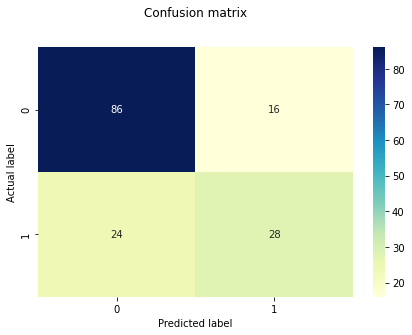

In [6]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [7]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))


Accuracy: 0.7402597402597403
Precision: 0.6363636363636364
Recall: 0.5384615384615384


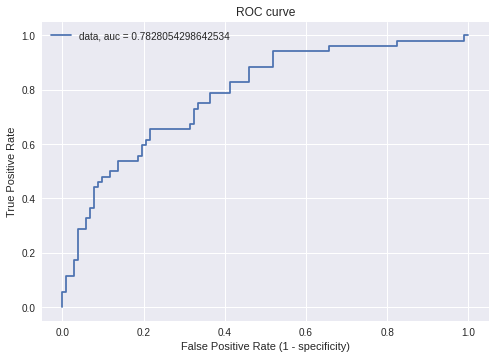

In [8]:
Y_pred_proba = logReg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test,  Y_pred_proba[:,1])
auc = metrics.roc_auc_score(Y_test, Y_pred_proba[:,1])
plt.style.use('seaborn')
plt.plot(fpr,tpr,label = "data, auc = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.title('ROC curve')
plt.legend()
plt.show()
